---

<h1 style="text-align: center;font-size: 40px;">Weather Type Prediction</h1>

---


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dataset\test.csv
dataset\alien_test\Cloud_1.png
dataset\alien_test\Cloud_2.jpg
dataset\alien_test\Cloud_3.jpeg
dataset\alien_test\Cloud_4.jpg
dataset\alien_test\foggy_1.jpg
dataset\alien_test\foggy_10.jpg
dataset\alien_test\foggy_2.jpg
dataset\alien_test\foggy_3.jpg
dataset\alien_test\foggy_4.jpg
dataset\alien_test\foggy_5.jpg
dataset\alien_test\foggy_6.jpg
dataset\alien_test\foggy_7.jpg
dataset\alien_test\foggy_8.jpg
dataset\alien_test\foggy_9.jpg
dataset\alien_test\rain_1.jpg
dataset\alien_test\rain_2.png
dataset\alien_test\rain_3.jpg
dataset\alien_test\rain_4.jpg
dataset\alien_test\rain_5.jpg
dataset\alien_test\rain_6.jpg
dataset\alien_test\shine_1.jpg
dataset\alien_test\shine_2.jpg
dataset\alien_test\shine_3.jpg
dataset\alien_test\sunrise_1.jpg
dataset\alien_test\sunrise_2.jpg
dataset\alien_test\sunrise_3.jpg
dataset\alien_test\sunrise_4.jpg
dataset\alien_test\sunrise_5.jpg
dataset\alien_test\sunrise_6.jpg
dataset\alien_test\sunrise_7.jpg
dataset\cloudy\cloudy1.jpg
dataset\cloudy\c

In [2]:
root_dir = "dataset/"
os.listdir(root_dir)

['alien_test', 'cloudy', 'foggy', 'rainy', 'shine', 'sunrise', 'test.csv']

In [3]:
foggy = "dataset/foggy"
sunrise = "dataset/sunrise"
shine = "dataset/shine"
rainy = "dataset/rainy"
cloudy = "dataset/cloudy"
test = "dataset/alien_test"

In [4]:
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 300
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 300


<h3>Data preprocessing for our Model</h3>

In [5]:
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [6]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 356.56it/s]


In [7]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((1498, 150, 150, 3), (1498,))

In [8]:
'''import seaborn as sns
plt.figure(figsize=(9,7))
plt.style.use("fivethirtyeight")
y_counts = y.value_counts()
sns.countplot(y)
plt.show()'''

'import seaborn as sns\nplt.figure(figsize=(9,7))\nplt.style.use("fivethirtyeight")\ny_counts = y.value_counts()\nsns.countplot(y)\nplt.show()'

><h3>Let's see some of the Images</h3>

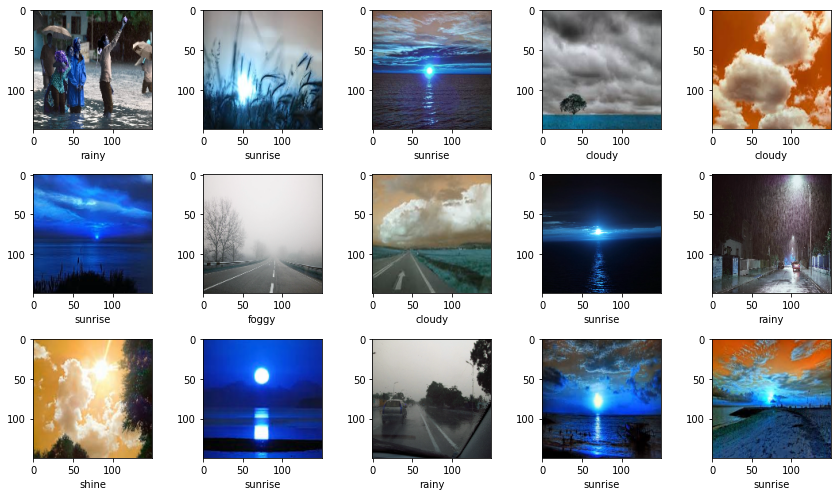

In [9]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)
    
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [13]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [14]:
y_train_lb.shape,y_test_lb.shape

((1198, 5), (300, 5))

><h3>Model building</h3>

In [15]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

80150528/80134624 [==============================] - 9s 0us/step


In [16]:
for layer in vgg.layers:
    layer.trainable = False

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model =Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(5,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 5)                 40965     
                                                                 
Total params: 20,065,349
Trainable params: 40,965
Non-trainable params: 20,024,384
_________________________________________________________________


In [19]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

In [20]:
unique,counts = np.unique(y_train_lb,return_counts=True)
print(unique,counts)

[0 1] [4792 1198]


In [21]:
batch_size=32
history =  model.fit(x_train,y_train_lb,epochs=15,validation_data=(x_test,y_test_lb),
                     batch_size=32 ,verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
38/38 [==============================] - ETA: 0s - loss: 0.9374 - accuracy: 0.6694
Epoch 1: val_accuracy improved from -inf to 0.76333, saving model to vgg19.h5
38/38 [==============================] - 102s 3s/step - loss: 0.9374 - accuracy: 0.6694 - val_loss: 0.6313 - val_accuracy: 0.7633
Epoch 2/15
38/38 [==============================] - ETA: 0s - loss: 0.4379 - accuracy: 0.8631
Epoch 2: val_accuracy improved from 0.76333 to 0.86667, saving model to vgg19.h5
38/38 [==============================] - 122s 3s/step - loss: 0.4379 - accuracy: 0.8631 - val_loss: 0.4126 - val_accuracy: 0.8667
Epoch 3/15
38/38 [==============================] - ETA: 0s - loss: 0.3174 - accuracy: 0.9115
Epoch 3: val_accuracy improved from 0.86667 to 0.88000, saving model to vgg19.h5
38/38 [==============================] - 128s 3s/step - loss: 0.3174 - accuracy: 0.9115 - val_loss: 0.3710 - val_accuracy: 0.8800
Epoch 4/15
38/38 [==============================] - ETA: 0s - loss: 0.2483 - accuracy: 0

In [22]:
loss,accuracy = model.evaluate(x_test,y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")     

10/10 [==============================] - 31s 3s/step - loss: 0.2800 - accuracy: 0.9033
Loss: 0.2799590528011322
Accuracy: 0.903333306312561


In [24]:
import numpy as np

# Assuming model is your trained Sequential model
y_probabilities = model.predict(x_test)
y_pred = np.argmax(y_probabilities, axis=1)

# Display the first 15 predictions
print(y_pred[:15])

[2 0 0 0 3 3 2 0 4 1 1 2 0 0 1]


><h3>Classification Report</h3>

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        60
           1       0.84      0.93      0.88        56
           2       0.94      0.90      0.92        71
           3       0.97      0.76      0.85        45
           4       0.93      0.97      0.95        68

    accuracy                           0.90       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.91      0.90      0.90       300



><h3>Confusion Matrix</h3>

In [27]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


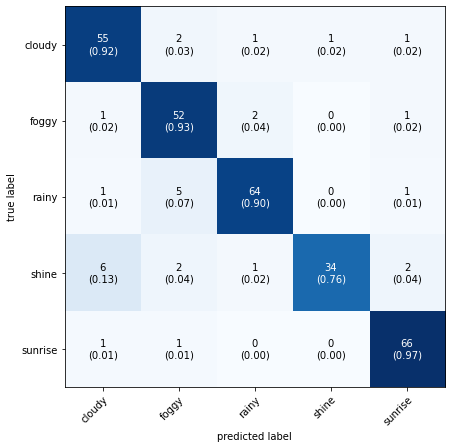

In [28]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["cloudy","foggy","rainy","shine","sunrise"],
                      show_normed = True);

><h3>Learning Curve:</h3>

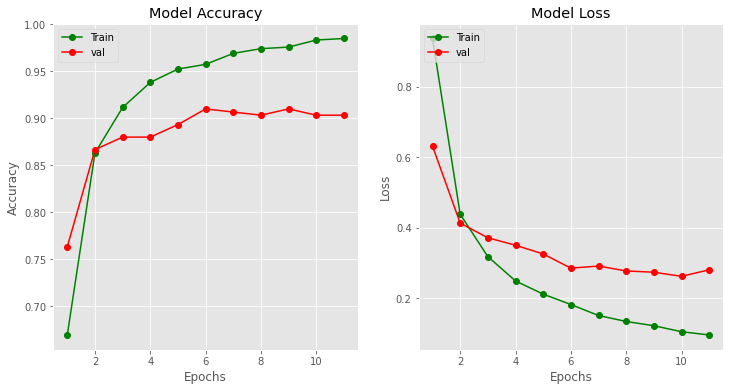

In [31]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs[:len(history.history["accuracy"])], history.history["accuracy"], "go-")
plt.plot(epochs[:len(history.history["val_accuracy"])], history.history["val_accuracy"], "ro-")

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs[:len(history.history["loss"])], history.history["loss"], "go-")
plt.plot(epochs[:len(history.history["val_loss"])], history.history["val_loss"], "ro-")

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

><h3>Model Performance:</h3>

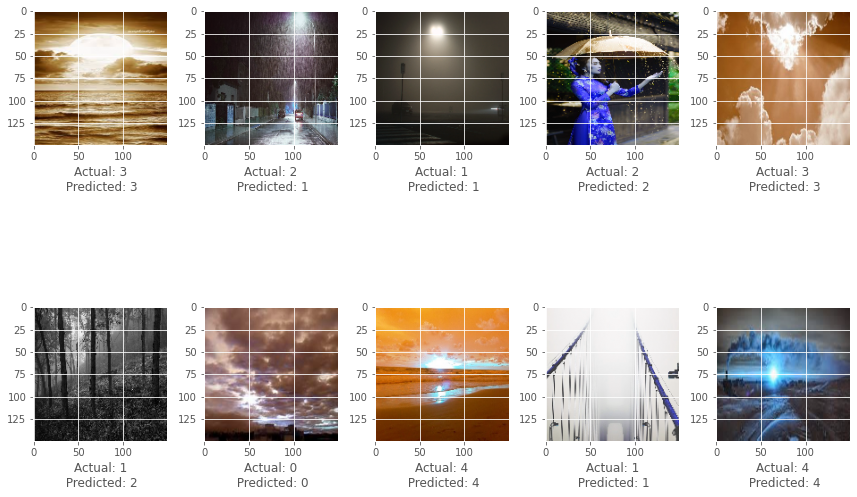

In [32]:
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(10):
    sample = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(x_test[sample])
    plt.xlabel(f"Actual: {y_test[sample]}\n Predicted: {y_pred[sample]}")
    
plt.tight_layout()    
plt.show()                       

In [33]:
model.save("wheather_prediction.h5")